In [4]:
!pip install ultralytics
!pip install 'git+https://github.com/facebookresearch/segment-anything.git'
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-85fuc9xu
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-85fuc9xu
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=e24594a8f6b5cfacf703559390134f0a558a098f8e40938d041428ad08668eaf
  Stored in directory: /tmp/pip-ephem-wheel-cache-ht91ij8q/wheels/15/d7/bd/05f5f23b7dcbe70cbc6783b06f12143b0cf1a5da5c7b52dcc5
Successfully built segment_anything
--2025-03-23 12:46:53--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.226.210.78, 13.226.210.25, 13.226.210.111, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.22

In [5]:
import ultralytics
from ultralytics import YOLO
import cv2
import numpy as np
from IPython.display import display, Image
from segment_anything import sam_model_registry, SamPredictor
import matplotlib.pyplot as plt
ultralytics.checks()

Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 43.5/107.7 GB disk)


In [6]:
!yolo predict model= yolov8n.pt source= '/content/original.jpg'

100% 6.25M/6.25M [00:00<00:00, 88.5MB/s]
Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/original.jpg: 640x384 1 person, 308.0ms
Speed: 21.1ms preprocess, 308.0ms inference, 28.4ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


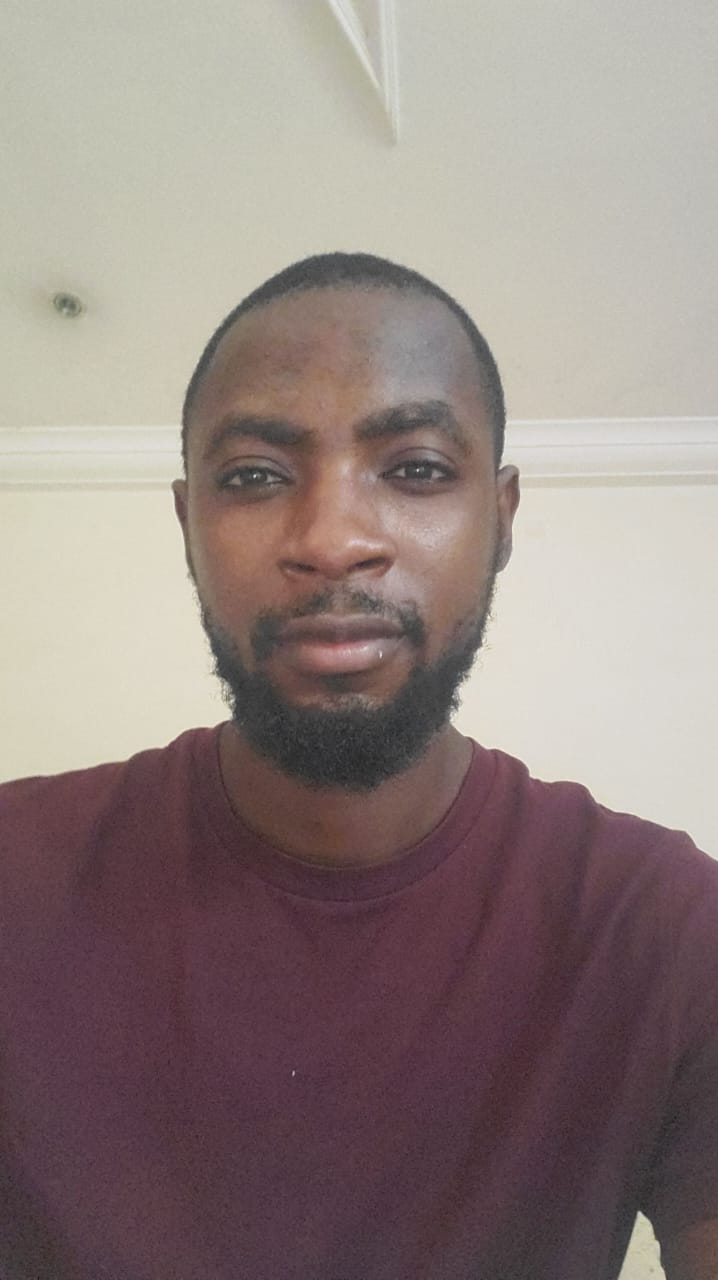

In [14]:
from IPython.display import Image
Image(filename='/content/original.jpg',height=600)

In [15]:
model = YOLO('yolov8n.pt')
result = model.predict(source='/content/original.jpg',conf=0.25)


image 1/1 /content/original.jpg: 640x384 1 person, 170.0ms
Speed: 5.2ms preprocess, 170.0ms inference, 5.4ms postprocess per image at shape (1, 3, 640, 384)


In [16]:
result

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [17]:
for results in result:
  boxes = results.boxes
bbox= boxes.xyxy.tolist()[0]

bbox


[2.7191162109375, 261.4056396484375, 714.4644775390625, 1278.7088623046875]

In [18]:
sam_checkpoint= '/content/sam_vit_h_4b8939.pth.1'
model_type = "vit_h"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
predictor = SamPredictor(sam)

In [19]:
image=cv2.cvtColor(cv2.imread('/content/original.jpg'),cv2.COLOR_BGR2RGB)
predictor.set_image(image)

In [29]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
        h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(image)
    ax.imshow(mask_image)


    def show_points(coords, labels, ax, marker_size=375):
     pos_points = coords[labels==1]
     neg_points = coords[labels==0]
     ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
     ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)




In [31]:
def show_box(box, ax):
     x0, y0 = box[0], box[1]
     w, h = box[2] - box[0], box[3] - box[1]
     ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))


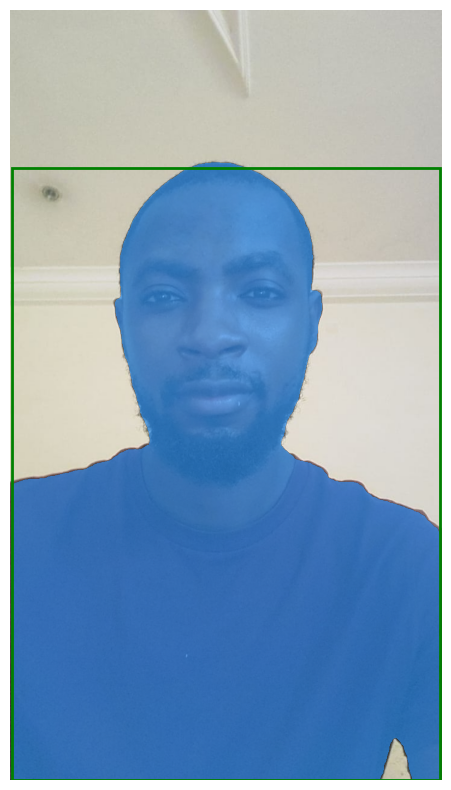

In [32]:
input_box = np.array(bbox)

masks,_,_ = predictor.predict(
    point_coords=None,
    point_labels=None,
    box = input_box[None,:],
    multimask_output=False,
)

plt.figure(figsize=(10,10))
plt.imshow(image)
show_mask(masks[0],plt.gca())
show_box(input_box,plt.gca())
plt.axis('off')
plt.show()

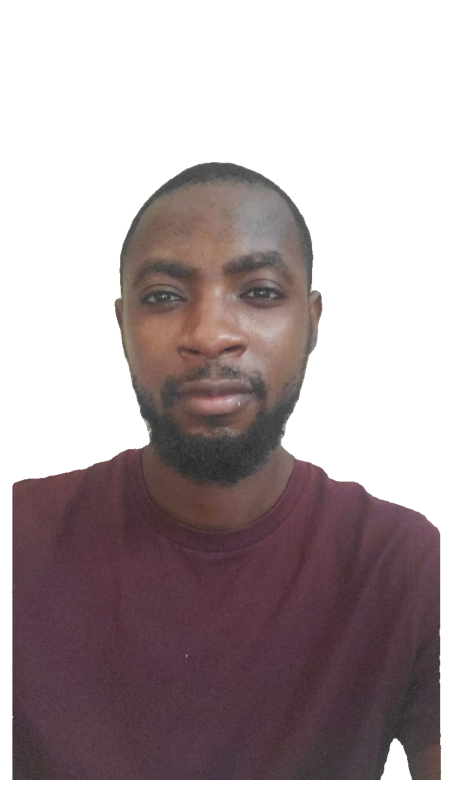

In [33]:
segmentation_task = masks[0]
binary_mask = np.where(segmentation_task>0.5,1,0)

white_background = np.ones_like(image) * 255
new_image = white_background * (1 - binary_mask[..., np.newaxis]) + image * binary_mask[..., np.newaxis]

plt.figure(figsize=(10, 10))
plt.imshow(new_image)
plt.axis('off')
plt.show()
